In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [13]:
red.shape

(1599, 13)

In [14]:
white.shape

(4898, 13)

In [5]:
red["Type"] = 0
white["Type"] = 1

In [6]:
wine = white.append(red, ignore_index=True)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [19]:
x = wine.iloc[:, :12].values
y = wine.iloc[:, 12].values

In [20]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x = scaller.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
trainX, testX, trainY, testY= train_test_split(x, y, test_size=0.3)

In [30]:
trainX.shape

(4547, 12)

# Deep Learning Part

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_shape=(12,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
#outputLayer
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(trainX, trainY, epochs=20, validation_split = 0.3, batch_size=4547)

Epoch 1/20
1/1 [==============================] - 0s 113ms/step - loss: 0.6764 - accuracy: 0.7464 - val_loss: 0.6561 - val_accuracy: 0.7736
Epoch 2/20
1/1 [==============================] - 0s 16ms/step - loss: 0.6586 - accuracy: 0.7596 - val_loss: 0.6390 - val_accuracy: 0.7934
Epoch 3/20
1/1 [==============================] - 0s 15ms/step - loss: 0.6413 - accuracy: 0.7806 - val_loss: 0.6224 - val_accuracy: 0.8132
Epoch 4/20
1/1 [==============================] - 0s 15ms/step - loss: 0.6245 - accuracy: 0.8045 - val_loss: 0.6063 - val_accuracy: 0.8315
Epoch 5/20
1/1 [==============================] - 0s 17ms/step - loss: 0.6083 - accuracy: 0.8243 - val_loss: 0.5906 - val_accuracy: 0.8484
Epoch 6/20
1/1 [==============================] - 0s 15ms/step - loss: 0.5923 - accuracy: 0.8432 - val_loss: 0.5751 - val_accuracy: 0.8579
Epoch 7/20
1/1 [==============================] - 0s 15ms/step - loss: 0.5766 - accuracy: 0.8551 - val_loss: 0.5595 - val_accuracy: 0.8755
Epoch 8/20
1/1 [==========

In [52]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_23 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 33        
Total params: 7,261
Trainable params: 7,261
Non-trainable params: 0
_________________________________________________________________


In [53]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

In [54]:
tva = pd.DataFrame({
    "Ta":accuracy,
    "Va":val_accuracy
})

<AxesSubplot:>

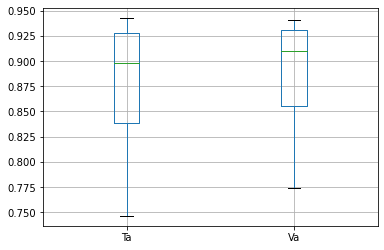

In [55]:
tva.boxplot()